In [333]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from imblearn.under_sampling import RandomUnderSampler
import shutil

In [334]:
file_path_normalisasi_extreme = 'D:\Tugas Akhir\Stroke\hasil_setelah_normalisasi.csv'
df_normalisasi_Extreme = pd.read_csv(file_path_normalisasi_extreme)

file_path_normalisasi_mild = 'D:\\Tugas Akhir\\Stroke\\data_oversampled.csv'
df_normalisasi_mild = pd.read_csv(file_path_normalisasi_mild)



In [335]:
df_normalisasi_Extreme

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,0.7368,0,1,1,0,1,0,0,0.8012,0.5227,0,1,0,0,1
1,0,0.9649,0,1,1,0,1,0,1,0.2342,0.4380,0,0,1,0,1
2,1,0.4211,0,0,1,0,1,0,0,0.5358,0.4773,0,0,0,1,1
3,1,0.9474,1,0,1,0,0,1,1,0.5491,0.2624,0,0,1,0,1
4,0,0.9825,0,0,1,0,1,0,0,0.6050,0.3657,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,1,0.5614,0,0,1,0,1,0,1,0.1049,0.2149,0,0,1,0,0
3685,1,0.9825,0,0,1,0,0,1,0,0.3232,0.5930,0,0,1,0,0
3686,1,0.1754,0,0,1,0,0,1,1,0.1283,0.3988,0,0,1,0,0
3687,0,0.4561,0,0,1,0,1,0,1,0.5130,0.2955,0,1,0,0,0


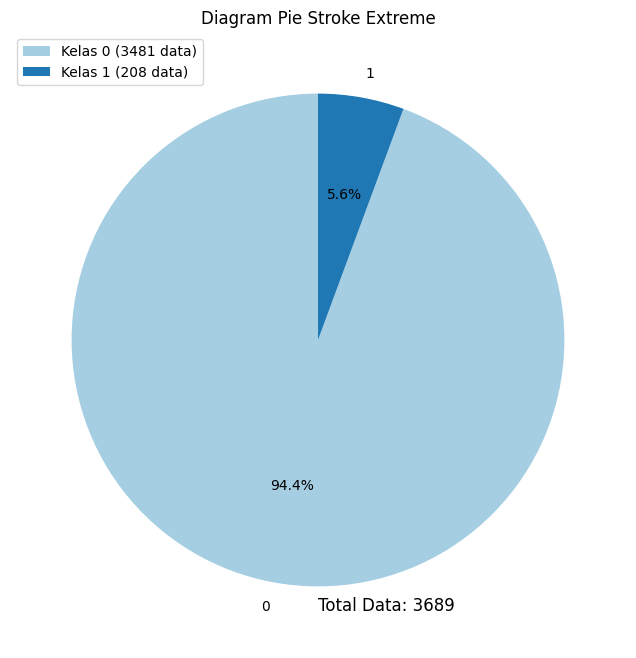

In [336]:
# Hitung frekuensi nilai unik dalam kolom 'stroke'
stroke_counts = df_normalisasi_Extreme['stroke'].value_counts()

# Plotting diagram pie untuk kolom 'stroke'
plt.figure(figsize=(8, 8))
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Berikan judul
plt.title('Diagram Pie Stroke Extreme')

# Tambahkan keterangan legend
legend_labels = [f'Kelas {label} ({count} data)' for label, count in zip(stroke_counts.index, stroke_counts)]
plt.legend(legend_labels, loc='upper left')

# Tambahkan keterangan total data
total_data = len(df_normalisasi_Extreme['stroke'])
plt.text(0, -1.1, f'Total Data: {total_data}', fontsize=12, ha='left')

# Tampilkan diagram
plt.show()


In [337]:
df_normalisasi_mild

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,"0,7368",0,1,1,0,1,0,0,"0,8012","0,5227",0,1,0,0,1
1,0,"0,9649",0,1,1,0,1,0,1,"0,2342","0,438",0,0,1,0,1
2,1,"0,4211",0,0,1,0,1,0,0,"0,5358","0,4773",0,0,0,1,1
3,1,"0,9474",1,0,1,0,0,1,1,"0,5491","0,2624",0,0,1,0,1
4,0,"0,9825",0,0,1,0,1,0,0,"0,605","0,3657",0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5766,1,"0,8804",0,0,1,0,1,0,1,"0,6311","0,3073",1,0,0,0,1
5767,0,"0,8583",0,0,1,0,1,0,1,"0,1403","0,2548",1,0,0,0,1
5768,1,"0,9298",0,0,1,0,1,0,0,"0,0904","0,1904",1,0,0,0,1
5769,1,"0,9009",0,0,1,0,1,0,1,"0,2097","0,2386",1,0,0,0,1


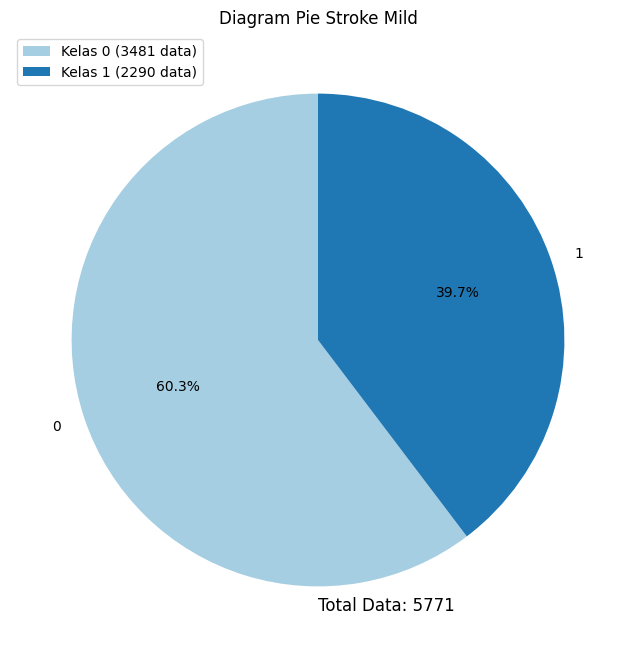

In [338]:
# Hitung frekuensi nilai unik dalam kolom 'stroke'
stroke_counts = df_normalisasi_mild['stroke'].value_counts()

# Plotting diagram pie untuk kolom 'stroke'
plt.figure(figsize=(8, 8))
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Berikan judul
plt.title('Diagram Pie Stroke Mild')

# Tambahkan keterangan legend
legend_labels = [f'Kelas {label} ({count} data)' for label, count in zip(stroke_counts.index, stroke_counts)]
plt.legend(legend_labels, loc='upper left')

# Tambahkan keterangan total data
total_data = len(df_normalisasi_mild['stroke'])
plt.text(0, -1.1, f'Total Data: {total_data}', fontsize=12, ha='left')

# Tampilkan diagram
plt.show()


In [339]:
# Menentukan jumlah baris yang akan dihapus secara acak (178 data dengan stroke = 1)
jumlah_hapus = 178

# Mengambil indeks baris dengan stroke = 1
indeks_stroke_1 = df_normalisasi_Extreme[df_normalisasi_Extreme['stroke'] == 1].index

# Memastikan jumlah data yang akan dihapus tidak melebihi jumlah data dengan stroke = 1
jumlah_hapus = min(jumlah_hapus, len(indeks_stroke_1))

# Menghapus baris dengan indeks yang telah dipilih
indeks_hapus = np.random.choice(indeks_stroke_1, size=jumlah_hapus, replace=False)
df_normalisasi_Extreme = df_normalisasi_Extreme.drop(index=indeks_hapus)

# Mengurutkan ulang indeks setelah penghapusan
df_normalisasi_Extreme = df_normalisasi_Extreme.reset_index(drop=True)

# Menampilkan informasi setelah penghapusan dan pengurutan
print(f"Jumlah baris sebelum dihapus: {len(df_normalisasi_Extreme) + jumlah_hapus}")
print(f"Jumlah baris setelah dihapus dan diurutkan: {len(df_normalisasi_Extreme)}")

# Hitung jumlah kelas 0 dan 1
jumlah_kelas = df_normalisasi_Extreme['stroke'].value_counts()

# Tampilkan hasil
print("Jumlah Kelas 0 (Tanpa Stroke):", jumlah_kelas[0])
print("Jumlah Kelas 1 (Dengan Stroke):", jumlah_kelas[1])

# Menyimpan DataFrame ke file CSV
output_csv_path = 'D:/Tugas Akhir/Stroke/hasil_setelah_penghapusan.csv'
df_normalisasi_Extreme.to_csv(output_csv_path, index=False)

# Copy file CSV ke direktori tujuan (misalnya, 'D:/Tugas Akhir/Stroke/')
output_final_path = 'D:/Tugas Akhir/Stroke/data_setelah_penghapusan_dan_urutan.csv'
shutil.copy(output_csv_path, output_final_path)

Jumlah baris sebelum dihapus: 3689
Jumlah baris setelah dihapus dan diurutkan: 3511
Jumlah Kelas 0 (Tanpa Stroke): 3481
Jumlah Kelas 1 (Dengan Stroke): 30


'D:/Tugas Akhir/Stroke/data_setelah_penghapusan_dan_urutan.csv'

In [340]:
df_normalisasi_Extreme

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,1,0.6316,0,1,1,1,0,0,1,0.3013,0.5269,0,0,0,1,1
1,1,0.4211,0,0,1,0,1,0,0,0.0263,0.3843,0,0,1,0,1
2,0,0.8947,1,0,1,0,1,0,1,0.8699,0.4607,0,0,1,0,1
3,1,0.5789,0,0,1,0,1,0,0,0.2403,0.5640,0,1,0,0,1
4,1,0.9123,1,0,1,0,0,1,0,0.3183,0.4153,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3506,1,0.5614,0,0,1,0,1,0,1,0.1049,0.2149,0,0,1,0,0
3507,1,0.9825,0,0,1,0,0,1,0,0.3232,0.5930,0,0,1,0,0
3508,1,0.1754,0,0,1,0,0,1,1,0.1283,0.3988,0,0,1,0,0
3509,0,0.4561,0,0,1,0,1,0,1,0.5130,0.2955,0,1,0,0,0


In [341]:
# Menampilkan informasi setelah penghapusan
print(f"Jumlah baris sebelum dihapus: {len(df_normalisasi_Extreme) + jumlah_hapus}")
print(f"Jumlah baris setelah dihapus: {len(df_normalisasi_Extreme)}")

# Hitung jumlah kelas 0 dan 1
jumlah_kelas_extreme = df_normalisasi_Extreme['stroke'].value_counts()
jumlah_kelas_Mild = df_normalisasi_mild['stroke'].value_counts()

# Tampilkan hasil
print("Jumlah Kelas 0 (Tanpa Stroke Pada Data Extreme):", jumlah_kelas_extreme[0])
print("Jumlah Kelas 1 (Dengan Stroke Pada Data Extreme):", jumlah_kelas_extreme[1])
print("Jumlah Kelas 0 (Tanpa Stroke Pada Data Mild):", jumlah_kelas_Mild[0])
print("Jumlah Kelas 1 (Dengan Stroke Pada Data Mild):", jumlah_kelas_Mild[1])

Jumlah baris sebelum dihapus: 3689
Jumlah baris setelah dihapus: 3511
Jumlah Kelas 0 (Tanpa Stroke Pada Data Extreme): 3481
Jumlah Kelas 1 (Dengan Stroke Pada Data Extreme): 30
Jumlah Kelas 0 (Tanpa Stroke Pada Data Mild): 3481
Jumlah Kelas 1 (Dengan Stroke Pada Data Mild): 2290


<Axes: >

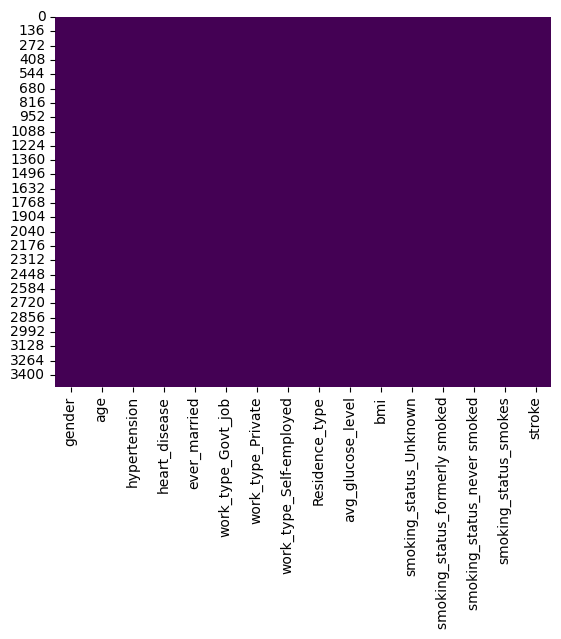

In [342]:
#Membaca missing values dengan menggunakan heatmap
sns.heatmap(df_normalisasi_Extreme.isnull(), cbar=False, cmap='viridis')

<Axes: >

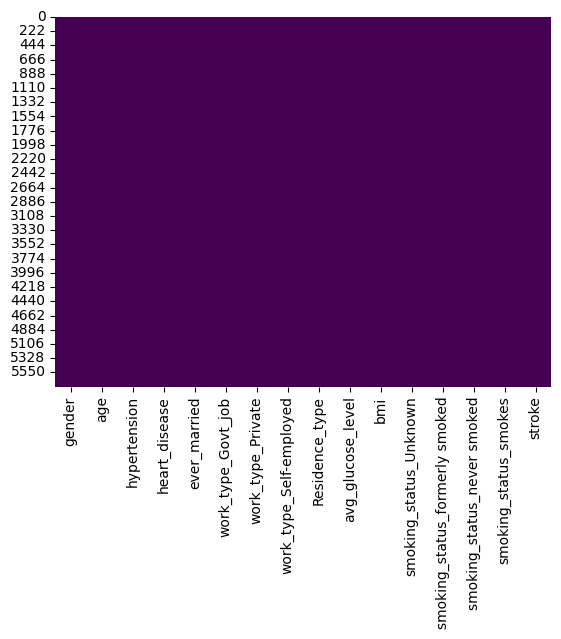

In [343]:
#Membaca missing values dengan menggunakan heatmap
sns.heatmap(df_normalisasi_mild.isnull(), cbar=False, cmap='viridis')

In [344]:
df_Extreme = df_normalisasi_Extreme
df_Mild = df_normalisasi_mild

# Ganti koma menjadi titik dalam kolom yang memerlukan perubahan
df_Extreme['age'] = df_Extreme['age'].astype(str).str.replace(',', '.')
df_Extreme['avg_glucose_level'] = df_Extreme['avg_glucose_level'].astype(str).str.replace(',', '.')
df_Extreme['bmi'] = df_Extreme['bmi'].astype(str).str.replace(',', '.')

# Konversi kolom ke tipe data float
df_Extreme[['age', 'avg_glucose_level', 'bmi']] = df_Extreme[['age', 'avg_glucose_level', 'bmi']].astype(float)

x_extreme = df_Extreme.drop('stroke', axis=1)
y_extreme = df_Extreme['stroke']

# Ganti koma menjadi titik dalam kolom yang memerlukan perubahan
df_Mild['age'] = df_Mild['age'].astype(str).str.replace(',', '.')
df_Mild['avg_glucose_level'] = df_Mild['avg_glucose_level'].astype(str).str.replace(',', '.')
df_Mild['bmi'] = df_Mild['bmi'].astype(str).str.replace(',', '.')

# Konversi kolom ke tipe data float
df_Mild[['age', 'avg_glucose_level', 'bmi']] = df_Mild[['age', 'avg_glucose_level', 'bmi']].astype(float)

x_mild = df_Mild.drop('stroke', axis=1)
y_mild = df_Mild['stroke']

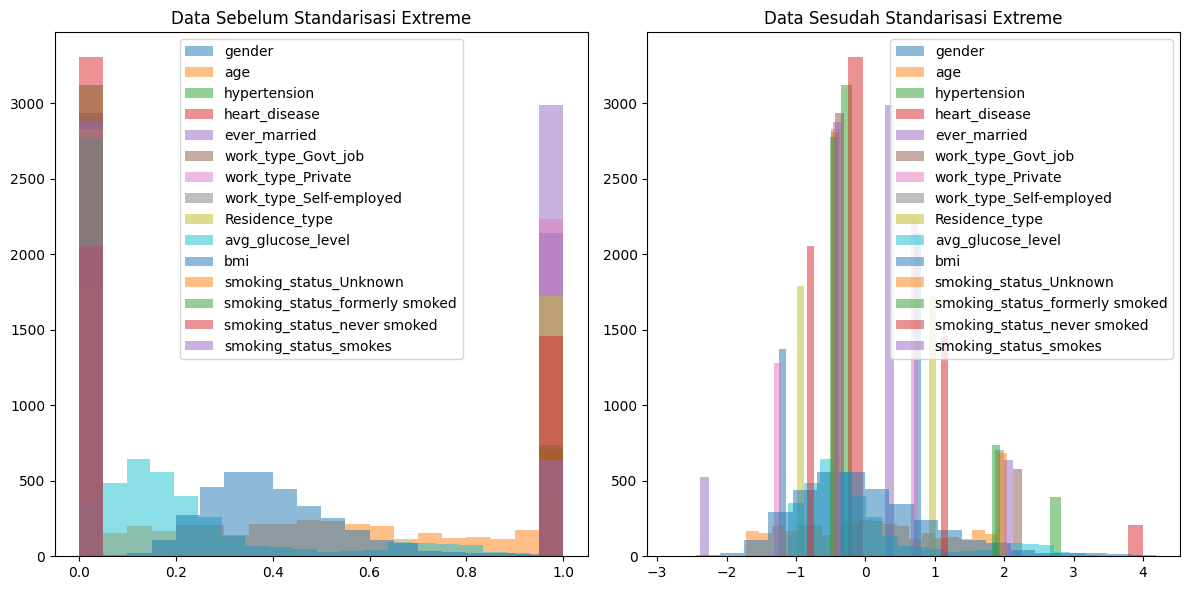

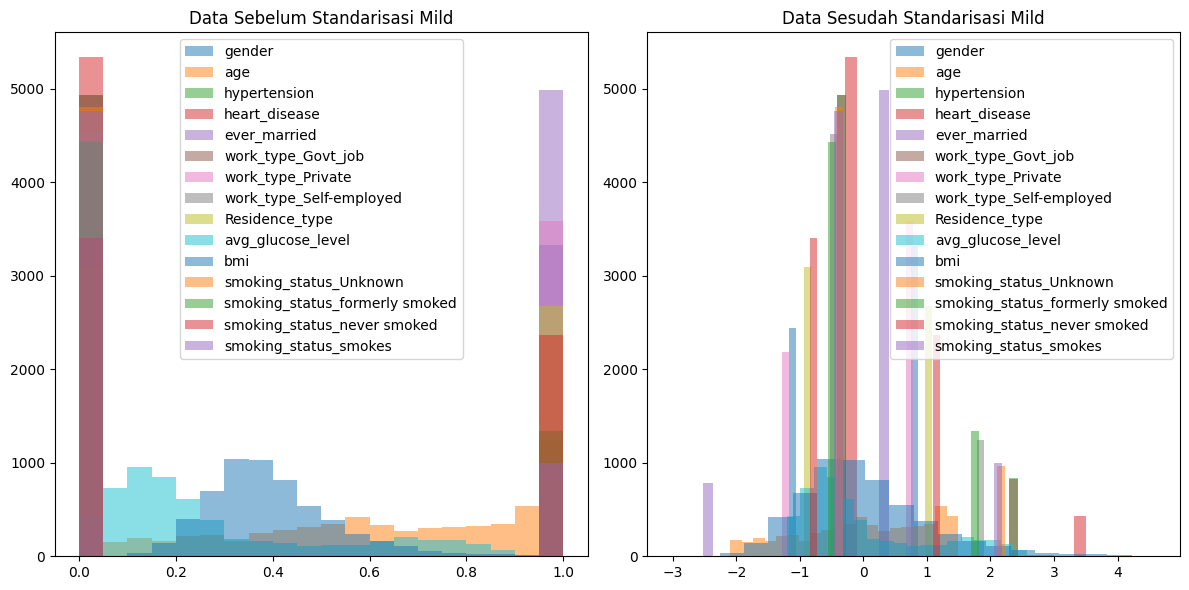

In [345]:
# Drop label target (misalnya, 'stroke') dari DataFrame
df_features_extreme = df_normalisasi_Extreme.drop('stroke', axis=1)
df_features_mild = df_normalisasi_mild.drop('stroke', axis=1)

# Standarisasi data untuk kedua dataset
scaler_extreme = StandardScaler()
df_scaled_extreme = pd.DataFrame(scaler_extreme.fit_transform(df_features_extreme), columns=df_features_extreme.columns)

scaler_mild = StandardScaler()
df_scaled_mild = pd.DataFrame(scaler_mild.fit_transform(df_features_mild), columns=df_features_mild.columns)

# Plot perbandingan data sebelum dan sesudah standarisasi untuk Extreme
plt.figure(figsize=(12, 6))

# Plot data sebelum standarisasi untuk Extreme
plt.subplot(1, 2, 1)
plt.title("Data Sebelum Standarisasi Extreme")
for column in df_features_extreme.columns:
    plt.hist(df_features_extreme[column], bins=20, alpha=0.5, label=column)
plt.legend()

# Plot data sesudah standarisasi untuk Extreme
plt.subplot(1, 2, 2)
plt.title("Data Sesudah Standarisasi Extreme")
for column in df_scaled_extreme.columns:
    plt.hist(df_scaled_extreme[column], bins=20, alpha=0.5, label=column)
plt.legend()

plt.tight_layout()
plt.show()

# Plot perbandingan data sebelum dan sesudah standarisasi untuk Mild
plt.figure(figsize=(12, 6))

# Plot data sebelum standarisasi untuk Mild
plt.subplot(1, 2, 1)
plt.title("Data Sebelum Standarisasi Mild")
for column in df_features_mild.columns:
    plt.hist(df_features_mild[column], bins=20, alpha=0.5, label=column)
plt.legend()

# Plot data sesudah standarisasi untuk Mild
plt.subplot(1, 2, 2)
plt.title("Data Sesudah Standarisasi Mild")
for column in df_scaled_mild.columns:
    plt.hist(df_scaled_mild[column], bins=20, alpha=0.5, label=column)
plt.legend()

plt.tight_layout()
plt.show()

In [346]:
# Tampilkan matriks kovarians
cov_matrix_extreme = np.cov(df_scaled_extreme, rowvar=False)
print("Matriks Kovarians:")
print(cov_matrix_extreme)

# Tampilkan matriks kovarians
cov_matrix_mild = np.cov(df_scaled_mild, rowvar=False)
print("Matriks Kovarians:")
print(cov_matrix_mild)

Matriks Kovarians:
[[ 1.00028490e+00 -5.73920456e-02 -4.64389268e-02 -9.72698959e-02
  -2.96511400e-02  5.78074905e-04 -6.15169968e-03  6.85953432e-03
  -3.58883508e-03 -6.09360448e-02 -2.39155773e-02 -3.09928598e-03
  -6.69202099e-02  8.40523403e-02 -3.37193922e-02]
 [-5.73920456e-02  1.00028490e+00  2.26821409e-01  2.52471996e-01
   2.67410217e-01 -7.64449406e-03 -2.19717689e-01  2.71148308e-01
  -1.04695341e-02  1.97389531e-01 -3.48979223e-02 -2.37890473e-02
   1.52818045e-01 -2.90224158e-02 -9.98124383e-02]
 [-4.64389268e-02  2.26821409e-01  1.00028490e+00  9.55871957e-02
   6.19753020e-02 -1.02626266e-02 -5.48928989e-02  7.54623213e-02
  -4.70052197e-04  1.69446977e-01  1.09117619e-01 -8.53517759e-02
   2.90311120e-02  4.99630138e-02 -6.80923057e-03]
 [-9.72698959e-02  2.52471996e-01  9.55871957e-02  1.00028490e+00
   2.66156083e-02 -1.60171961e-02 -4.42194926e-02  6.79526063e-02
   8.40799034e-03  1.16437702e-01 -1.46717631e-02 -2.54299507e-02
   4.97488894e-02 -3.67207333e-02  2


Varian Setiap Variabel Extreme:
[1.0002849 1.0002849 1.0002849 1.0002849 1.0002849 1.0002849 1.0002849
 1.0002849 1.0002849 1.0002849 1.0002849 1.0002849 1.0002849 1.0002849
 1.0002849]

Varian Setiap Variabel Mild:
[1.00017331 1.00017331 1.00017331 1.00017331 1.00017331 1.00017331
 1.00017331 1.00017331 1.00017331 1.00017331 1.00017331 1.00017331
 1.00017331 1.00017331 1.00017331]

Kovarians Antar Variabel:
[[ 0.00000000e+00 -5.73920456e-02 -4.64389268e-02 -9.72698959e-02
  -2.96511400e-02  5.78074905e-04 -6.15169968e-03  6.85953432e-03
  -3.58883508e-03 -6.09360448e-02 -2.39155773e-02 -3.09928598e-03
  -6.69202099e-02  8.40523403e-02 -3.37193922e-02]
 [-5.73920456e-02  0.00000000e+00  2.26821409e-01  2.52471996e-01
   2.67410217e-01 -7.64449406e-03 -2.19717689e-01  2.71148308e-01
  -1.04695341e-02  1.97389531e-01 -3.48979223e-02 -2.37890473e-02
   1.52818045e-01 -2.90224158e-02 -9.98124383e-02]
 [-4.64389268e-02  2.26821409e-01  0.00000000e+00  9.55871957e-02
   6.19753020e-02 -1.02

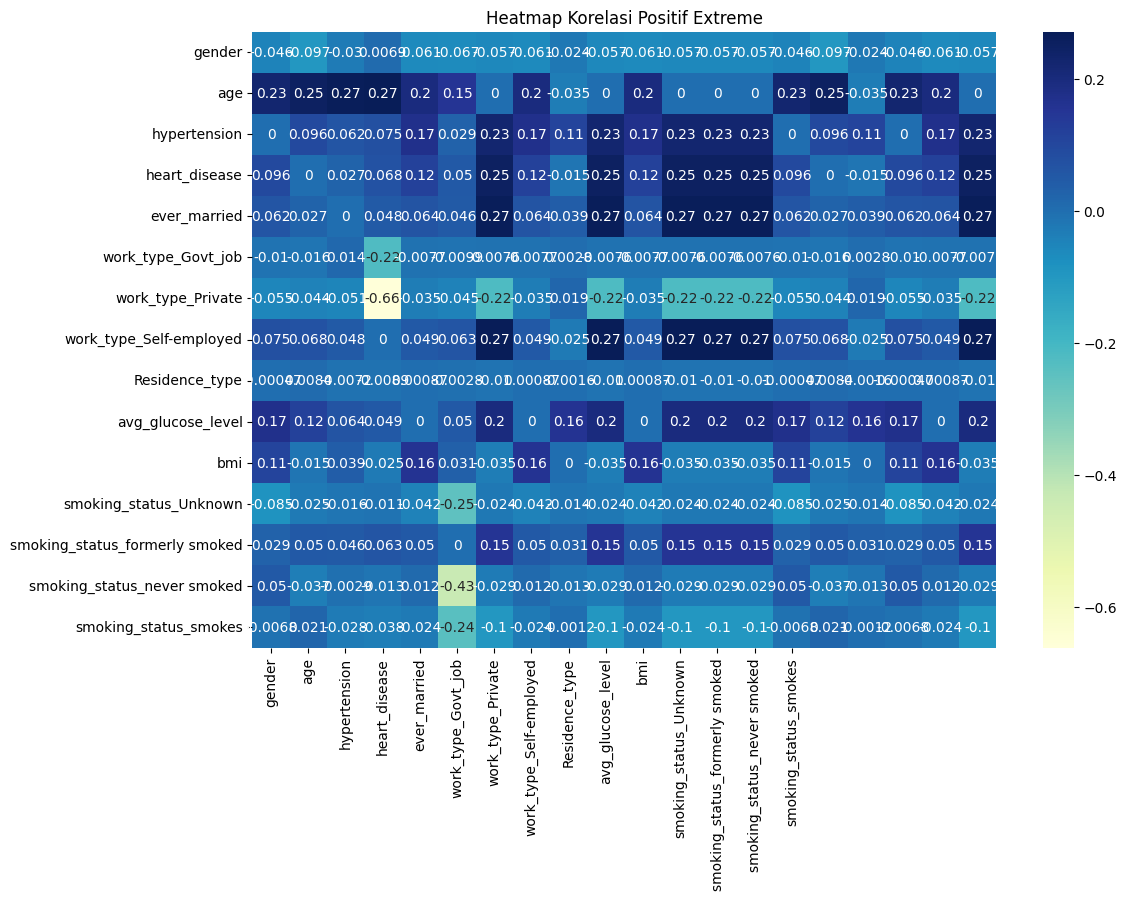

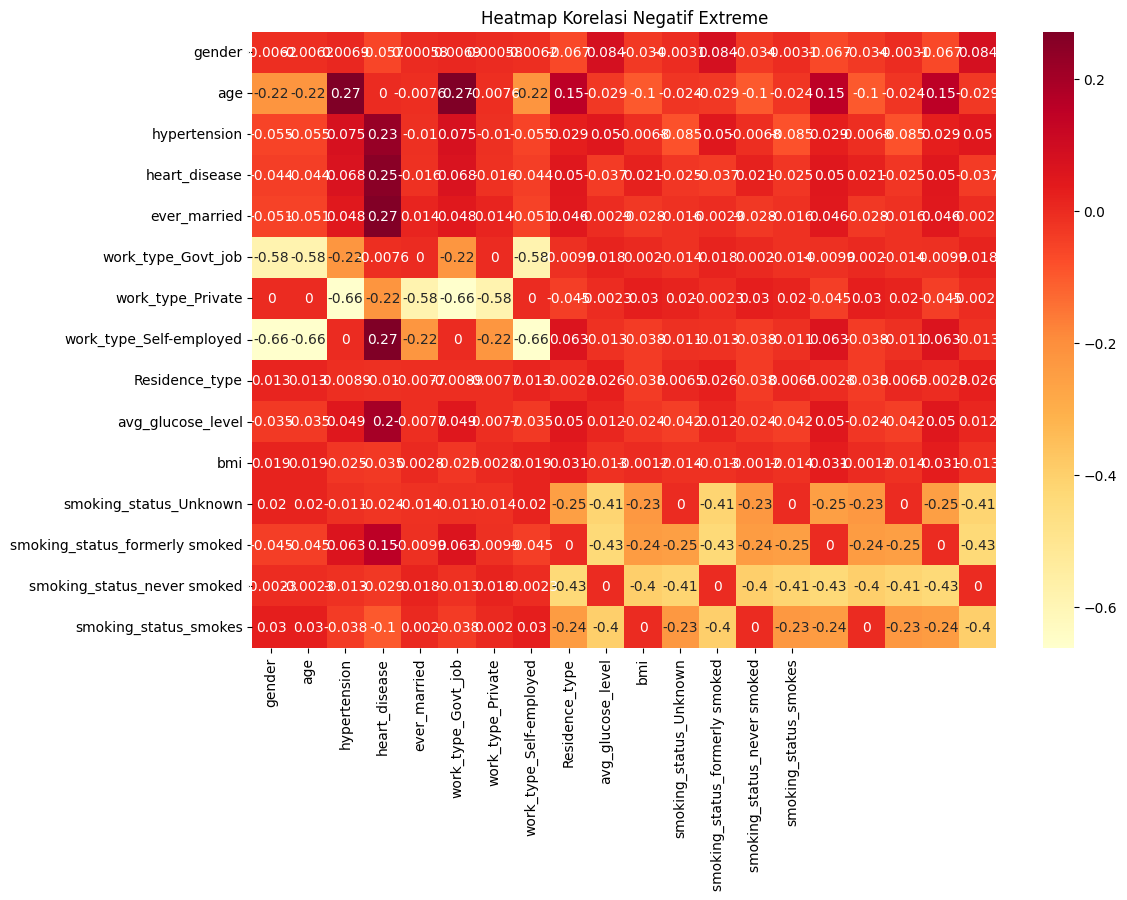

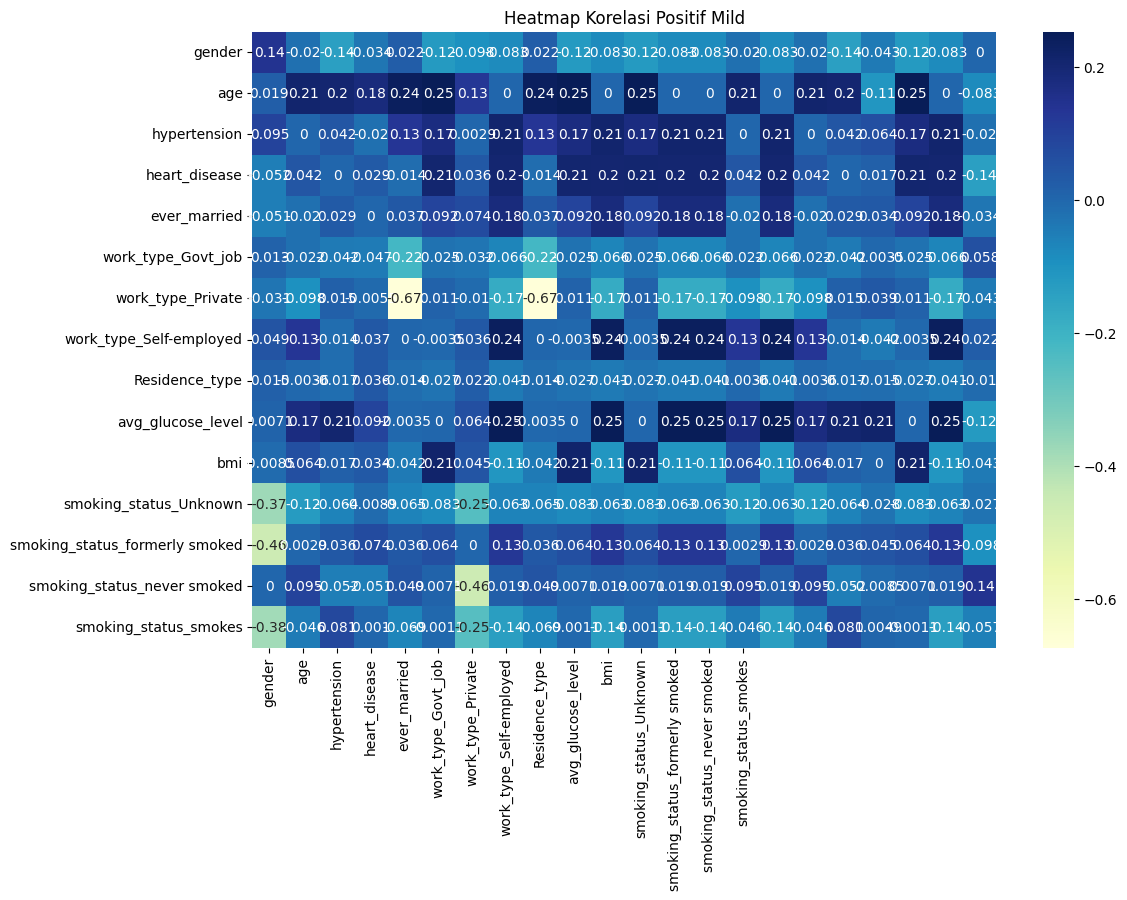

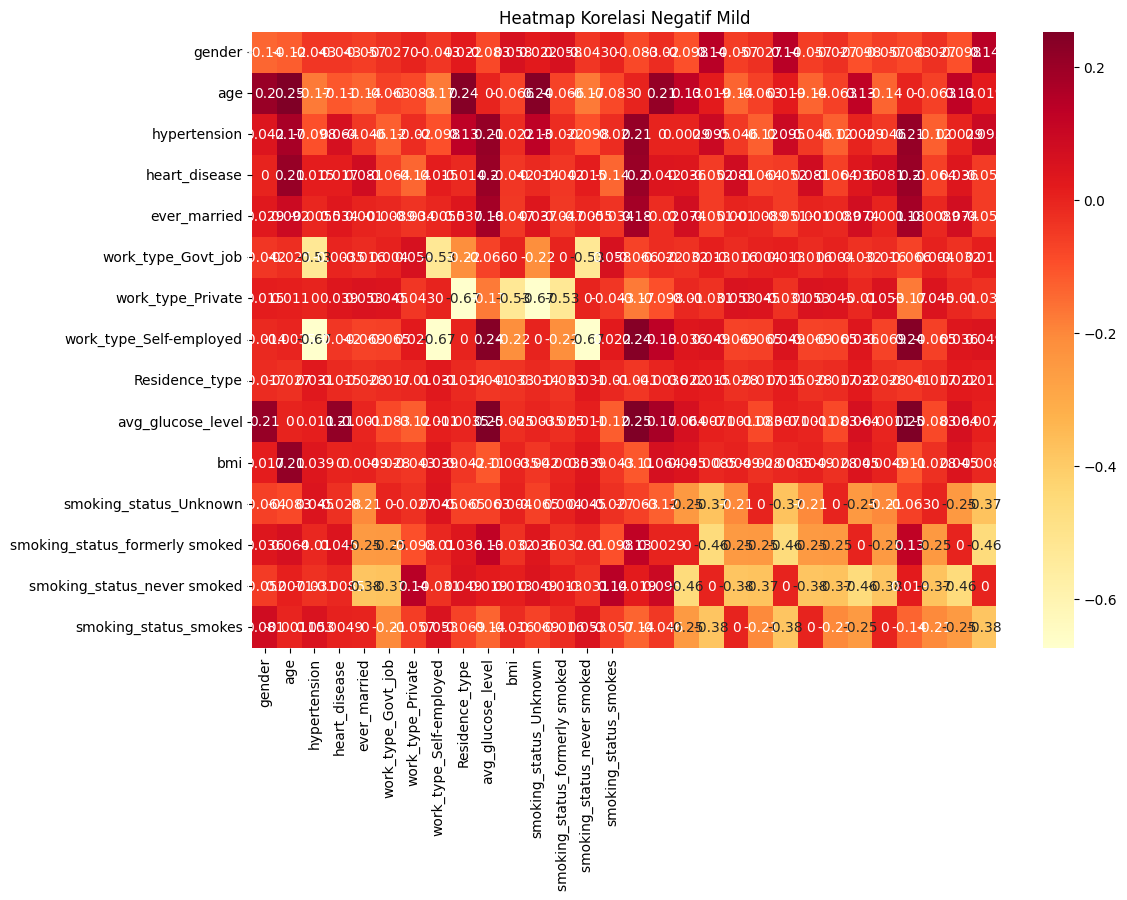

In [347]:
column_names = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
                'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed',
                'Residence_type', 'avg_glucose_level', 'bmi',
                'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
threshold = 0.1
# Tampilkan elemen diagonal utama (varian)
variances_extreme = np.diag(cov_matrix_extreme)
print("\nVarian Setiap Variabel Extreme:")
print(variances_extreme)

# Tampilkan elemen diagonal utama (varian)
variances_mild = np.diag(cov_matrix_mild)
print("\nVarian Setiap Variabel Mild:")
print(variances_mild)

# Tampilkan elemen non-diagonal (kovarians)
covariances_extreme = cov_matrix_extreme - np.diag(variances_extreme)
print("\nKovarians Antar Variabel:")
print(covariances_extreme)

# Tampilkan elemen non-diagonal (kovarians)
covariances_mild = cov_matrix_mild - np.diag(variances_mild)
print("\nKovarians Antar Variabel:")
print(covariances_mild)

# Temukan kolom-kolom dengan korelasi positif dan negatif
positive_correlation_indices_extreme = np.where(covariances_extreme > threshold)
negative_correlation_indices_extreme = np.where(covariances_extreme < -threshold)
# Temukan kolom-kolom dengan korelasi positif dan negatif
positive_correlation_indices_mild = np.where(covariances_mild > threshold)
negative_correlation_indices_mild = np.where(covariances_mild < -threshold)

# Tampilkan hasil
print("\nKolom dengan Korelasi Positif Extreme:")
for i, j in zip(positive_correlation_indices_extreme[0], positive_correlation_indices_extreme[1]):
    print(f"{column_names[i]} dan {column_names[j]}")

print("\nKolom dengan Korelasi Negatif Extreme:")
for i, j in zip(negative_correlation_indices_extreme[0], negative_correlation_indices_extreme[1]):
    print(f"{column_names[i]} dan {column_names[j]}")

# Tampilkan hasil
print("\nKolom dengan Korelasi Positif Mild:")
for i, j in zip(positive_correlation_indices_mild[0], positive_correlation_indices_mild[1]):
    print(f"{column_names[i]} dan {column_names[j]}")

print("\nKolom dengan Korelasi Negatif Mild:")
for i, j in zip(negative_correlation_indices_mild[0], negative_correlation_indices_mild[1]):
    print(f"{column_names[i]} dan {column_names[j]}")

# Plot korelasi positif
plt.figure(figsize=(12, 8))
plt.title("Heatmap Korelasi Positif Extreme")
sns.heatmap(covariances_extreme[:, positive_correlation_indices_extreme[1]], annot=True, xticklabels=column_names, yticklabels=column_names, cmap="YlGnBu")
plt.show()

# Plot korelasi negatif
plt.figure(figsize=(12, 8))
plt.title("Heatmap Korelasi Negatif Extreme")
sns.heatmap(covariances_extreme[:, negative_correlation_indices_extreme[1]], annot=True, xticklabels=column_names, yticklabels=column_names, cmap="YlOrRd")
plt.show()

# Plot korelasi positif
plt.figure(figsize=(12, 8))
plt.title("Heatmap Korelasi Positif Mild")
sns.heatmap(covariances_mild[:, positive_correlation_indices_mild[1]], annot=True, xticklabels=column_names, yticklabels=column_names, cmap="YlGnBu")
plt.show()

# Plot korelasi negatif
plt.figure(figsize=(12, 8))
plt.title("Heatmap Korelasi Negatif Mild")
sns.heatmap(covariances_mild[:, negative_correlation_indices_mild[1]], annot=True, xticklabels=column_names, yticklabels=column_names, cmap="YlOrRd")
plt.show()

In [348]:
from sklearn.decomposition import PCA

# Hitung eigenvalues dan eigenvectors untuk data Extreme
pca_extreme = PCA()
pca_extreme.fit(df_scaled_extreme)
eigenvalues_extreme = pca_extreme.explained_variance_
eigenvectors_extreme = pca_extreme.components_

# Tampilkan eigenvalues beserta nama kolom untuk data Extreme
print("\nEigenvalues Extreme:")
for col, value in zip(df_normalisasi_Extreme.columns, eigenvalues_extreme):
    print(f"{col}: {round(value, 4)}")

# Tampilkan eigenvectors beserta nama kolom untuk data Extreme
print("\nEigenvectors Extreme:")
for i, vector in enumerate(eigenvectors_extreme):
    print(f"Principal Component {i + 1}:")
    for col, value in zip(df_normalisasi_Extreme.columns, vector):
        print(f"   {col}: {round(value, 4)}")

# Hitung eigenvalues dan eigenvectors untuk data Mild
pca_mild = PCA()
pca_mild.fit(df_scaled_mild)
eigenvalues_mild = pca_mild.explained_variance_
eigenvectors_mild = pca_mild.components_

# Tampilkan eigenvalues beserta nama kolom untuk data Mild
print("\nEigenvalues Mild:")
for col, value in zip(df_normalisasi_mild.columns, eigenvalues_mild):
    print(f"{col}: {round(value, 4)}")

# Tampilkan eigenvectors beserta nama kolom untuk data Mild
print("\nEigenvectors Mild:")
for i, vector in enumerate(eigenvectors_mild):
    print(f"Principal Component {i + 1}:")
    for col, value in zip(df_normalisasi_mild.columns, vector):
        print(f"   {col}: {round(value, 4)}")





Eigenvalues Extreme:
gender: 2.0807
age: 1.5789
hypertension: 1.519
heart_disease: 1.278
ever_married: 1.1957
work_type_Govt_job: 1.1805
work_type_Private: 1.0653
work_type_Self-employed: 1.0168
Residence_type: 0.9771
avg_glucose_level: 0.9217
bmi: 0.8419
smoking_status_Unknown: 0.7933
smoking_status_formerly smoked: 0.5554
smoking_status_never smoked: 0.0
smoking_status_smokes: 0.0

Eigenvectors Extreme:
Principal Component 1:
   gender: -0.0797
   age: 0.4597
   hypertension: 0.2376
   heart_disease: 0.2225
   ever_married: 0.2094
   work_type_Govt_job: 0.1798
   work_type_Private: -0.5253
   work_type_Self-employed: 0.4652
   Residence_type: -0.014
   avg_glucose_level: 0.2181
   bmi: 0.0352
   smoking_status_Unknown: -0.0778
   smoking_status_formerly smoked: 0.2066
   smoking_status_never smoked: -0.0343
   smoking_status_smokes: -0.0944
Principal Component 2:
   gender: -0.2335
   age: 0.1771
   hypertension: 0.1185
   heart_disease: 0.2123
   ever_married: 0.1148
   work_type_G

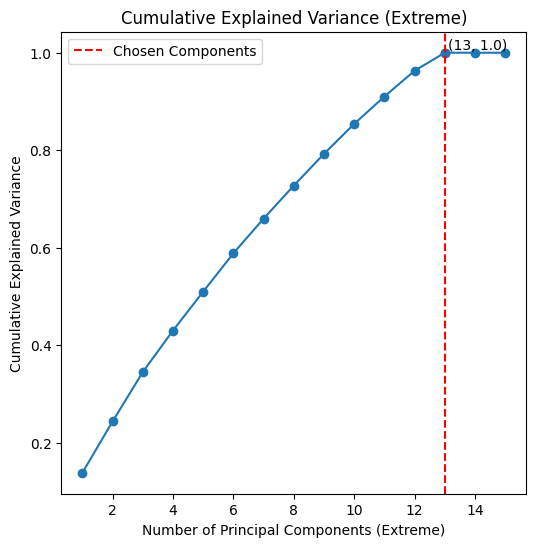

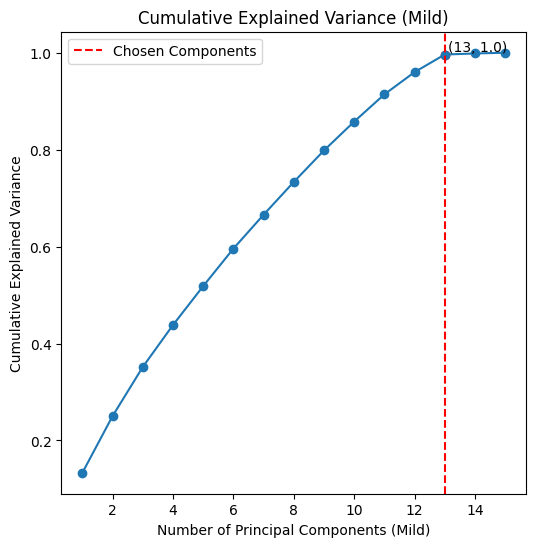

In [349]:
# Plotting cumulative explained variance untuk data Extreme
num_components_extreme = len(pca_extreme.explained_variance_ratio_)
plt.figure(figsize=(6, 6))

plt.plot(range(1, num_components_extreme + 1), np.cumsum(pca_extreme.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components (Extreme)')
plt.ylabel('Cumulative Explained Variance')

# Tambahkan garis putus-putus pada nilai 13 pada sumbu x
chosen_components_extreme = 13
plt.axvline(x=chosen_components_extreme, color='r', linestyle='--', label='Chosen Components')
plt.scatter(chosen_components_extreme, np.cumsum(pca_extreme.explained_variance_ratio_)[chosen_components_extreme-1], color='r')
plt.text(chosen_components_extreme + 0.1, np.cumsum(pca_extreme.explained_variance_ratio_)[chosen_components_extreme-1], f'({chosen_components_extreme}, {np.round(np.cumsum(pca_extreme.explained_variance_ratio_)[chosen_components_extreme-1], 2)})', verticalalignment='bottom')

plt.legend()
plt.title('Cumulative Explained Variance (Extreme)')
plt.show()

# Plotting cumulative explained variance untuk data Mild
num_components_mild = len(pca_mild.explained_variance_ratio_)
plt.figure(figsize=(6, 6))

plt.plot(range(1, num_components_mild + 1), np.cumsum(pca_mild.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components (Mild)')
plt.ylabel('Cumulative Explained Variance')

# Tambahkan garis putus-putus pada nilai 13 pada sumbu x
chosen_components_mild = 13
plt.axvline(x=chosen_components_mild, color='r', linestyle='--', label='Chosen Components')
plt.scatter(chosen_components_mild, np.cumsum(pca_mild.explained_variance_ratio_)[chosen_components_mild-1], color='r')
plt.text(chosen_components_mild + 0.1, np.cumsum(pca_mild.explained_variance_ratio_)[chosen_components_mild-1], f'({chosen_components_mild}, {np.round(np.cumsum(pca_mild.explained_variance_ratio_)[chosen_components_mild-1], 2)})', verticalalignment='bottom')

plt.legend()
plt.title('Cumulative Explained Variance (Mild)')
plt.show()


In [350]:
# Lakukan PCA untuk data Extreme
n_components_extreme = 13  # Ganti dengan jumlah komponen utama yang diinginkan untuk Extreme
pca_extreme = PCA(n_components=n_components_extreme)
X_pca_extreme = pca_extreme.fit_transform(df_scaled_extreme)

# Lakukan PCA untuk data Mild
n_components_mild = 13  # Ganti dengan jumlah komponen utama yang diinginkan untuk Mild
pca_mild = PCA(n_components=n_components_mild)
X_pca_mild = pca_mild.fit_transform(df_scaled_mild)

In [351]:
# Tampilkan explained variance ratio untuk Extreme
print("Explained Variance Ratio (Extreme):")
print(pca_extreme.explained_variance_ratio_)

# Tampilkan hasil penjumlahan explained variance ratio (kumulatif) untuk Extreme
cumulative_explained_variance_ratio_extreme = np.cumsum(pca_extreme.explained_variance_ratio_)
print("\nCumulative Explained Variance Ratio (Extreme):")
print(cumulative_explained_variance_ratio_extreme)

# Tampilkan komponen utama untuk Extreme
print("\nPrincipal Components (Extreme):")
print(pca_extreme.components_)

# Kolom Tambahan: Tampilkan kontribusi variabel terhadap komponen utama untuk Extreme
for i, ratio in enumerate(pca_extreme.explained_variance_ratio_):
    print(f"Komponen {i + 1} ({df_normalisasi_Extreme.columns[i]}) - Proporsi Varians: {ratio:.4f}")

# Tampilkan explained variance ratio untuk Mild
print("\nExplained Variance Ratio (Mild):")
print(pca_mild.explained_variance_ratio_)

# Tampilkan hasil penjumlahan explained variance ratio (kumulatif) untuk Mild
cumulative_explained_variance_ratio_mild = np.cumsum(pca_mild.explained_variance_ratio_)
print("\nCumulative Explained Variance Ratio (Mild):")
print(cumulative_explained_variance_ratio_mild)

# Tampilkan komponen utama untuk Mild
print("\nPrincipal Components (Mild):")
print(pca_mild.components_)

# Kolom Tambahan: Tampilkan kontribusi variabel terhadap komponen utama untuk Mild
for i, ratio in enumerate(pca_mild.explained_variance_ratio_):
    print(f"Komponen {i + 1} ({df_normalisasi_mild.columns[i]}) - Proporsi Varians: {ratio:.4f}")


Explained Variance Ratio (Extreme):
[0.13867637 0.1052267  0.10124114 0.08517517 0.07969383 0.07867691
 0.07099715 0.06776452 0.0651202  0.06143026 0.05611044 0.05286896
 0.03701836]

Cumulative Explained Variance Ratio (Extreme):
[0.13867637 0.24390306 0.3451442  0.43031938 0.5100132  0.58869012
 0.65968727 0.72745179 0.79257198 0.85400224 0.91011268 0.96298164
 1.        ]

Principal Components (Extreme):
[[-0.07969434  0.45965494  0.23756295  0.22248063  0.20940226  0.17981277
  -0.52533813  0.46521566 -0.01402581  0.21811639  0.03519705 -0.07777445
   0.20664489 -0.03429504 -0.09437808]
 [-0.23351111  0.17708996  0.11846146  0.21231653  0.11476016 -0.37621711
   0.37773687 -0.1062781  -0.02150215  0.18475042  0.11807328  0.13401083
   0.38081849 -0.55354744  0.16845813]
 [-0.00228106  0.1700888   0.30086429  0.1293176   0.13666523 -0.31535755
   0.33758649 -0.11427202  0.05513427  0.271692    0.14704313 -0.36339627
  -0.08230013  0.56123542 -0.25763998]
 [-0.14632417 -0.13025746  0

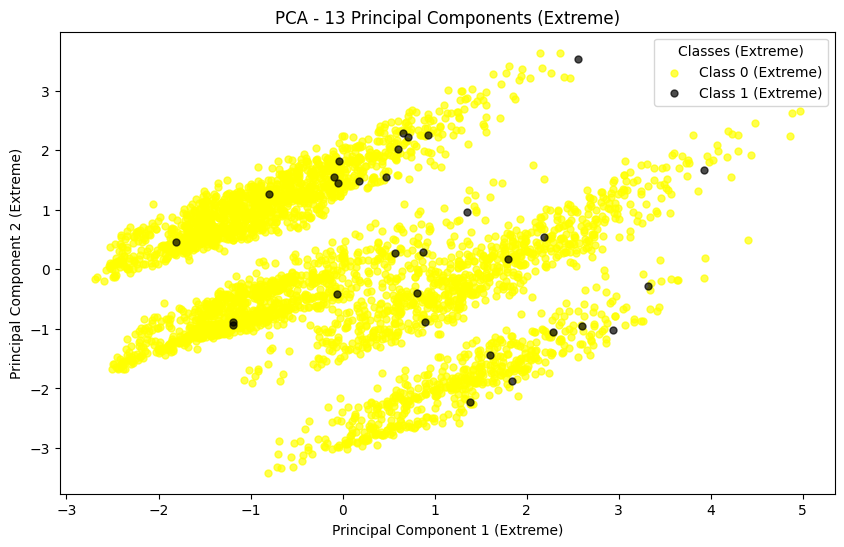

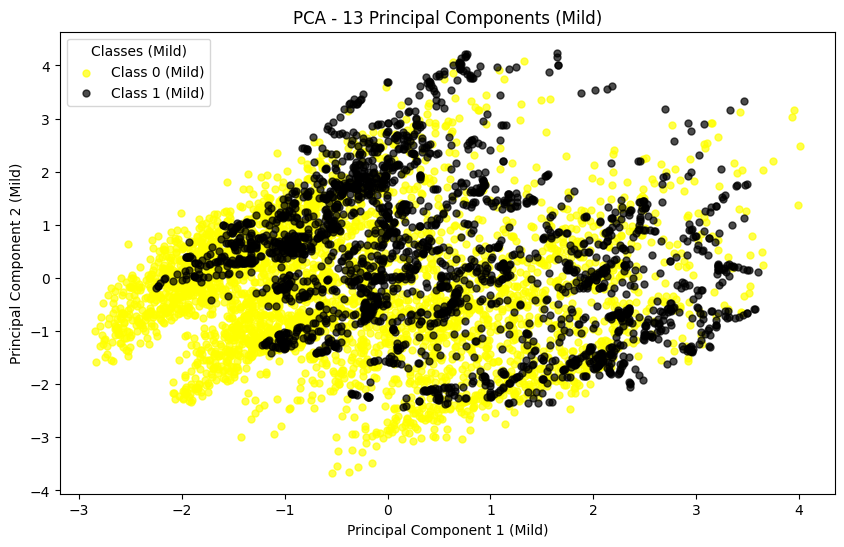

In [352]:
# Buat DataFrame hasil PCA untuk Extreme
df_pca_result_extreme = pd.DataFrame(data=X_pca_extreme, columns=[f"PC{i+1}_Extreme" for i in range(n_components_extreme)])
df_pca_result_extreme['stroke'] = y_extreme  # Tambahkan kolom target ke hasil PCA Extreme

# Simpan hasil PCA Extreme ke file CSV
df_pca_result_extreme.to_csv('data_setelah_pca_extreme.csv', index=False)

# Copy file CSV hasil PCA Extreme ke direktori tujuan
shutil.copy('data_setelah_pca_extreme.csv', 'D:/Tugas Akhir/Stroke/data_setelah_pca_extreme.csv')

# Plot hasil PCA untuk Extreme
plt.figure(figsize=(10, 6))

# Pisahkan kelas 0 dan kelas 1 pada Extreme
class_0_extreme = df_pca_result_extreme[df_pca_result_extreme['stroke'] == 0]
class_1_extreme = df_pca_result_extreme[df_pca_result_extreme['stroke'] == 1]

# Plot kelas 0 pada Extreme dengan warna kuning
plt.scatter(class_0_extreme['PC1_Extreme'], class_0_extreme['PC2_Extreme'], c='yellow', marker='o', s=25, alpha=0.7, label='Class 0 (Extreme)')

# Plot kelas 1 pada Extreme dengan warna hitam
plt.scatter(class_1_extreme['PC1_Extreme'], class_1_extreme['PC2_Extreme'], c='black', marker='o', s=25, alpha=0.7, label='Class 1 (Extreme)')

# Tambahkan legenda untuk kelas pada Extreme
plt.legend(title="Classes (Extreme)")

# Tambahkan label dan judul pada Extreme
plt.title('PCA - 13 Principal Components (Extreme)')
plt.xlabel('Principal Component 1 (Extreme)')
plt.ylabel('Principal Component 2 (Extreme)')
plt.show()

# Buat DataFrame hasil PCA untuk Mild
df_pca_result_mild = pd.DataFrame(data=X_pca_mild, columns=[f"PC{i+1}_Mild" for i in range(n_components_mild)])
df_pca_result_mild['stroke'] = y_mild  # Tambahkan kolom target ke hasil PCA Mild

# Simpan hasil PCA Mild ke file CSV
df_pca_result_mild.to_csv('data_setelah_pca_mild.csv', index=False)

# Copy file CSV hasil PCA Mild ke direktori tujuan
shutil.copy('data_setelah_pca_mild.csv', 'D:/Tugas Akhir/Stroke/data_setelah_pca_mild.csv')

# Plot hasil PCA untuk Mild
plt.figure(figsize=(10, 6))

# Pisahkan kelas 0 dan kelas 1 pada Mild
class_0_mild = df_pca_result_mild[df_pca_result_mild['stroke'] == 0]
class_1_mild = df_pca_result_mild[df_pca_result_mild['stroke'] == 1]

# Plot kelas 0 pada Mild dengan warna kuning
plt.scatter(class_0_mild['PC1_Mild'], class_0_mild['PC2_Mild'], c='yellow', marker='o', s=25, alpha=0.7, label='Class 0 (Mild)')

# Plot kelas 1 pada Mild dengan warna hitam
plt.scatter(class_1_mild['PC1_Mild'], class_1_mild['PC2_Mild'], c='black', marker='o', s=25, alpha=0.7, label='Class 1 (Mild)')

# Tambahkan legenda untuk kelas pada Mild
plt.legend(title="Classes (Mild)")

# Tambahkan label dan judul pada Mild
plt.title('PCA - 13 Principal Components (Mild)')
plt.xlabel('Principal Component 1 (Mild)')
plt.ylabel('Principal Component 2 (Mild)')
plt.show()


In [353]:
df_pca_result_extreme

,PC1_Extreme,PC2_Extreme,PC3_Extreme,PC4_Extreme,PC5_Extreme,PC6_Extreme,PC7_Extreme,PC8_Extreme,PC9_Extreme,PC10_Extreme,PC11_Extreme,PC12_Extreme,PC13_Extreme,stroke
0,1.792314,0.167709,-1.079980,2.740130,-0.344380,1.403215,-1.832285,0.943402,-0.858608,2.161579,-2.184783,1.841561,-0.371255,1
1,-1.186104,-0.935651,1.003769,-0.419373,-0.217783,-0.512150,-0.214916,-1.334780,0.323831,0.051791,-0.121115,0.645048,0.113594,1
2,1.353877,0.958229,3.496670,0.719710,0.440275,1.763643,0.175875,0.831540,-0.398100,-0.255918,1.457213,-1.675980,0.271473,1
3,-0.087824,1.554813,0.210883,-0.025472,1.278365,-1.282059,1.022760,-1.278622,0.191003,0.469958,-0.564833,0.501183,0.359697,1
4,2.937215,-1.022383,1.670216,-0.383908,-1.320359,0.313821,1.186694,-0.930403,0.401675,0.458021,1.827481,0.229243,0.018179,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3506,-0.944152,-0.961756,1.124594,-0.876703,-0.317649,-0.671615,-1.169430,-0.141301,-1.120854,0.398573,0.160358,-0.262037,0.260749,0
3507,2.347918,-1.203126,0.946390,-0.680030,-0.948198,0.034710,1.465961,-1.041971,0.264280,-0.308339,-1.064254,0.382043,1.198693,0
3508,0.737539,-2.087562,0.118525,-0.922073,-1.017695,-0.749002,0.921954,0.566003,-1.019709,-0.510685,-0.495277,0.394548,-1.145389,0
3509,0.051189,1.922414,0.315568,-0.074590,1.296342,-1.211891,-0.551713,0.777085,-0.508648,-0.654252,-0.144364,-1.504947,-0.444736,0


In [354]:
df_pca_result_mild

,PC1_Mild,PC2_Mild,PC3_Mild,PC4_Mild,PC5_Mild,PC6_Mild,PC7_Mild,PC8_Mild,PC9_Mild,PC10_Mild,PC11_Mild,PC12_Mild,PC13_Mild,stroke
0,0.692583,4.070785,0.341690,0.781236,1.025035,0.627786,-0.860729,0.935599,-0.213074,-1.431982,1.547270,0.560242,0.776168,1
1,0.442122,1.670641,1.827641,0.255005,-0.534702,0.867016,-2.053191,-0.634286,1.198394,-1.521385,1.150836,1.602076,-0.835692,1
2,-1.331145,0.854510,0.039186,1.732012,-0.839118,-0.461259,0.826414,-0.204432,-1.595500,0.540747,0.372651,-0.827407,0.176897,1
3,3.319632,-0.744979,1.398013,-0.613190,-1.003275,0.004069,0.259087,-0.659510,0.659191,1.761697,-0.122173,-0.380294,0.673034,1
4,0.416665,2.518512,-0.226657,-0.775090,0.869267,-0.148637,-0.590274,0.887080,-0.767889,-0.302738,-0.791681,-1.227713,-0.277239,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5766,-0.671230,0.745156,-0.248357,-1.304432,-0.225578,2.057133,-0.258829,-1.028321,0.093189,1.410109,0.940320,-1.474794,-0.033865,1
5767,-1.091993,0.587083,-0.945311,-1.723951,-0.804647,1.797878,-0.815555,-0.740829,1.026149,0.338245,-0.746141,-0.198623,-0.641214,1
5768,-1.001804,-0.204983,-0.928593,-1.795468,-1.057251,1.879419,-0.961362,0.604614,-1.104512,1.133638,0.110557,-0.087520,-0.573755,1
5769,-1.015178,0.024810,-0.696652,-1.881990,-0.730162,1.602167,-0.797571,-0.807514,0.175574,1.405021,0.605075,-0.464734,-0.588045,1


In [355]:
# Hitung jumlah data untuk target stroke 0 dan 1
class_counts_pca_extreme = df_pca_result_extreme['stroke'].value_counts()
# Cetak jumlah data untuk target stroke 0 dan 1
print(f'Jumlah data untuk target stroke 0: {class_counts_pca_extreme[0]}')
print(f'Jumlah data untuk target stroke 1: {class_counts_pca_extreme[1]}')

# Hitung jumlah data untuk target stroke 0 dan 1
class_counts_pca_mild = df_pca_result_mild['stroke'].value_counts()
# Cetak jumlah data untuk target stroke 0 dan 1
print(f'Jumlah data untuk target stroke 0: {class_counts_pca_mild[0]}')
print(f'Jumlah data untuk target stroke 1: {class_counts_pca_mild[1]}')

Jumlah data untuk target stroke 0: 3481
Jumlah data untuk target stroke 1: 30
Jumlah data untuk target stroke 0: 3481
Jumlah data untuk target stroke 1: 2290


Jumlah kluster optimal (elbow) - Extreme: 5
Jumlah kluster optimal (elbow) - Mild: 4


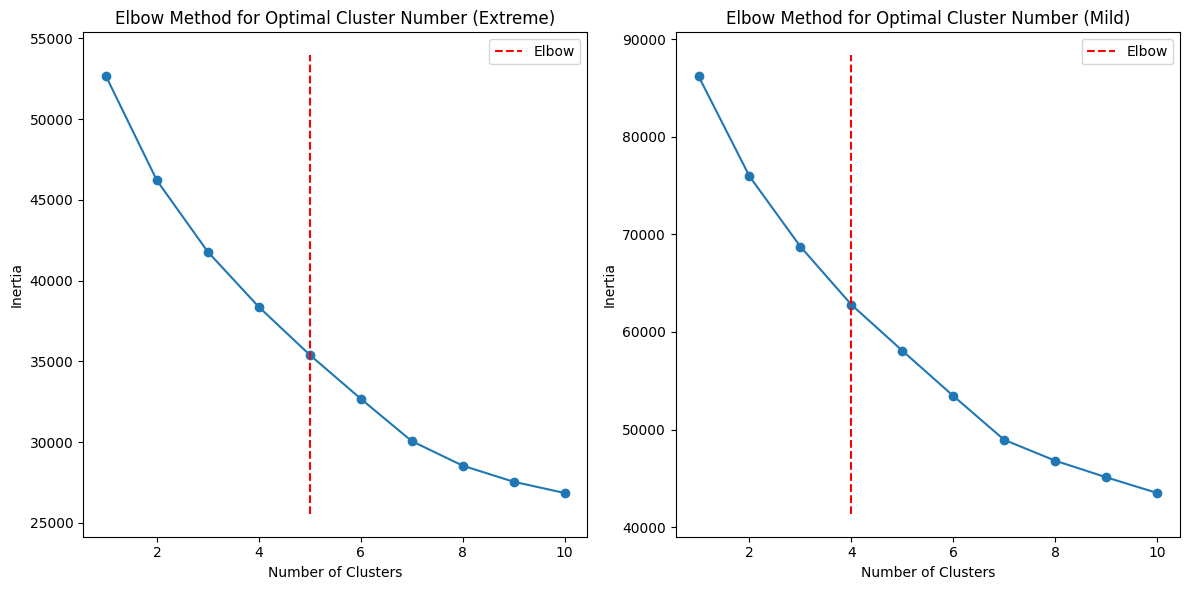

In [356]:
from kneed import KneeLocator
from sklearn.cluster import KMeans

# Range jumlah cluster yang akan diuji
range_clusters = range(1, 11)  # Misalnya, uji dari 1 hingga 10 clusters

# Simpan inersia untuk setiap jumlah cluster untuk Extreme
inertia_extreme = []

for n_clusters in range_clusters:
    kmeans_extreme = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans_extreme.fit(X_pca_extreme)
    inertia_extreme.append(kmeans_extreme.inertia_)

# Gunakan KneeLocator untuk menemukan elbow secara otomatis untuk Extreme
kl_extreme = KneeLocator(range_clusters, inertia_extreme, curve="convex", direction="decreasing")

# Plot Elbow Method dan tandai titik elbow untuk Extreme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range_clusters, inertia_extreme, marker='o')
plt.title('Elbow Method for Optimal Cluster Number (Extreme)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.vlines(kl_extreme.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red', label='Elbow')
plt.legend()

# Tampilkan jumlah kluster optimal untuk Extreme
print(f"Jumlah kluster optimal (elbow) - Extreme: {kl_extreme.elbow}")

# Simpan inersia untuk setiap jumlah cluster untuk Mild
inertia_mild = []

for n_clusters in range_clusters:
    kmeans_mild = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans_mild.fit(X_pca_mild)
    inertia_mild.append(kmeans_mild.inertia_)

# Gunakan KneeLocator untuk menemukan elbow secara otomatis untuk Mild
kl_mild = KneeLocator(range_clusters, inertia_mild, curve="convex", direction="decreasing")

# Plot Elbow Method dan tandai titik elbow untuk Mild
plt.subplot(1, 2, 2)
plt.plot(range_clusters, inertia_mild, marker='o')
plt.title('Elbow Method for Optimal Cluster Number (Mild)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.vlines(kl_mild.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red', label='Elbow')
plt.legend()

# Tampilkan jumlah kluster optimal untuk Mild
print(f"Jumlah kluster optimal (elbow) - Mild: {kl_mild.elbow}")

plt.tight_layout()
plt.show()


In [357]:
from sklearn import metrics

n_clusters_extreme = 5
n_clusters_mild = 6

# Range n_init yang akan diuji
range_n_init_extreme = [10, 20, 30, 40, 50]
# Range n_init yang akan diuji
range_n_init_mild = [10, 20, 30, 40, 50]

# Simpan metrik evaluasi untuk setiap n_init untuk Extreme
evaluation_metrics_extreme = {}

for n_init in range_n_init_extreme:
    kmeans_extreme = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=42)
    cluster_labels_extreme = kmeans_extreme.fit_predict(X_pca_extreme)
    
    # Hitung dan simpan metrik evaluasi, misalnya, silhouette score untuk Extreme
    silhouette_score_extreme = metrics.silhouette_score(X_pca_extreme, cluster_labels_extreme)
    evaluation_metrics_extreme[n_init] = silhouette_score_extreme

# Cetak hasil evaluasi untuk melihat sejauh mana hasil klastering konsisten untuk Extreme
print("Evaluation Metrics (Extreme):")
for n_init, score in evaluation_metrics_extreme.items():
    print(f"n_init={n_init}: Silhouette Score={score}")

# Simpan metrik evaluasi untuk setiap n_init untuk Mild
evaluation_metrics_mild = {}

for n_init in range_n_init_mild:
    kmeans_mild = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=42)
    cluster_labels_mild = kmeans_mild.fit_predict(X_pca_mild)
    
    # Hitung dan simpan metrik evaluasi, misalnya, silhouette score untuk Mild
    silhouette_score_mild = metrics.silhouette_score(X_pca_mild, cluster_labels_mild)
    evaluation_metrics_mild[n_init] = silhouette_score_mild

# Cetak hasil evaluasi untuk melihat sejauh mana hasil klastering konsisten untuk Mild
print("\nEvaluation Metrics (Mild):")
for n_init, score in evaluation_metrics_mild.items():
    print(f"n_init={n_init}: Silhouette Score={score}")


Evaluation Metrics (Extreme):
n_init=10: Silhouette Score=0.2004126830847086
n_init=20: Silhouette Score=0.20276003533403236
n_init=30: Silhouette Score=0.20202433328734337
n_init=40: Silhouette Score=0.20202433328734337
n_init=50: Silhouette Score=0.20202433328734337

Evaluation Metrics (Mild):
n_init=10: Silhouette Score=0.17889988608501212
n_init=20: Silhouette Score=0.20845893439669727
n_init=30: Silhouette Score=0.20845893439669727
n_init=40: Silhouette Score=0.20845893439669727
n_init=50: Silhouette Score=0.20845893439669727


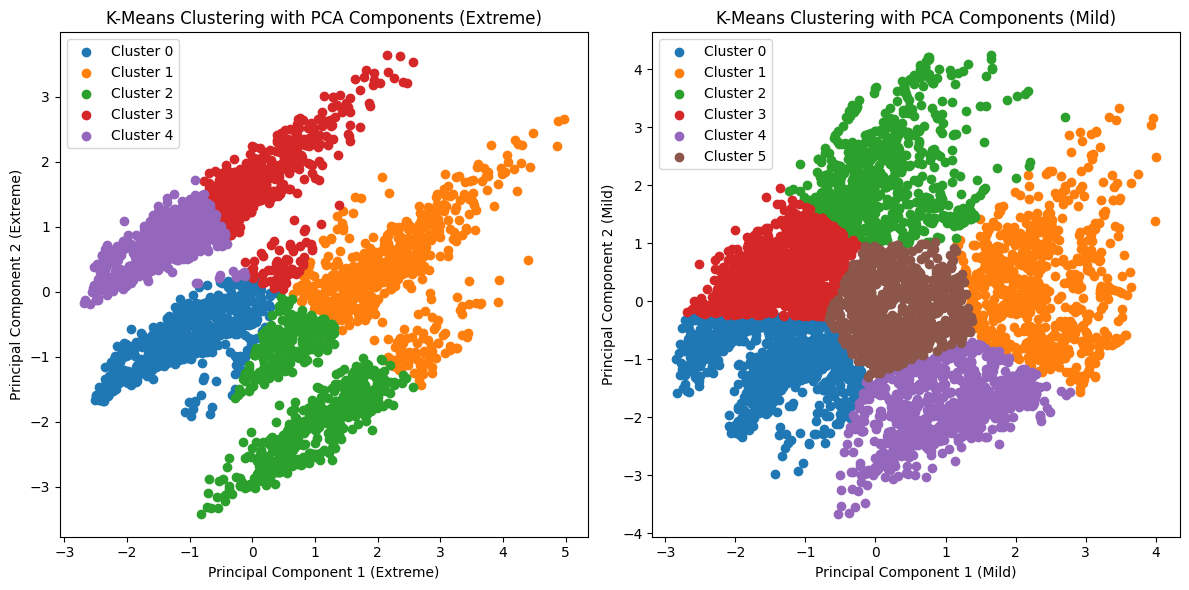

In [358]:
# Pilih fitur hasil PCA (dalam contoh ini, ambil PC1 dan PC2)
X_pca_extreme = df_pca_result_extreme[['PC1_Extreme', 'PC2_Extreme']].values

# Inisialisasi model K-Means dengan jumlah cluster yang diinginkan untuk Extreme
kmeans_extreme = KMeans(n_clusters=5, n_init=10, random_state=42)

# Menentukan label cluster untuk setiap data hasil PCA untuk Extreme
cluster_labels_extreme = kmeans_extreme.fit_predict(X_pca_extreme)

# Menyatukan label klaster ke dalam dataset hasil PCA untuk Extreme
df_pca_result_extreme['Cluster'] = cluster_labels_extreme

# Bulatkan nilai hasil Near Miss Resampling dengan rasio kustom ke 4 angka di belakang koma
df_pca_result_extreme_rounded = df_pca_result_extreme.round(4)

# Simpan hasil klastering Extreme ke file CSV
result_csv_path_extreme = 'D:/Tugas Akhir/Stroke/data_klastering_extreme.csv'
df_pca_result_extreme.to_csv(result_csv_path_extreme, index=False)

# Visualisasi hasil klastering untuk Extreme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

# Plot klaster untuk Extreme
for cluster in range(5):
    cluster_data_extreme = df_pca_result_extreme[df_pca_result_extreme["Cluster"] == cluster]
    plt.scatter(cluster_data_extreme[f"PC1_Extreme"], cluster_data_extreme[f"PC2_Extreme"], label=f'Cluster {cluster}')

# Tambahkan label dan judul untuk Extreme
plt.title('K-Means Clustering with PCA Components (Extreme)')
plt.xlabel('Principal Component 1 (Extreme)')
plt.ylabel('Principal Component 2 (Extreme)')
plt.legend()

# Pilih fitur hasil PCA (dalam contoh ini, ambil PC1 dan PC2)
X_pca_mild = df_pca_result_mild[['PC1_Mild', 'PC2_Mild']].values


# Inisialisasi model K-Means dengan jumlah cluster yang diinginkan untuk Mild
kmeans_mild = KMeans(n_clusters=6, n_init=20, random_state=42)

# Menentukan label cluster untuk setiap data hasil PCA untuk Mild
cluster_labels_mild = kmeans_mild.fit_predict(X_pca_mild)

# Menyatukan label klaster ke dalam dataset hasil PCA untuk Mild
df_pca_result_mild['Cluster'] = cluster_labels_mild

# Bulatkan nilai hasil Near Miss Resampling dengan rasio kustom ke 4 angka di belakang koma
df_pca_result_mild_rounded = df_pca_result_mild.round(4)

# Simpan hasil klastering Mild ke file CSV
result_csv_path_mild_rounded = 'D:/Tugas Akhir/Stroke/data_klastering_mild.csv'
df_pca_result_mild_rounded.to_csv(result_csv_path_mild_rounded, index=False)

# Visualisasi hasil klastering untuk Mild
plt.subplot(1, 2, 2)

# Plot klaster untuk Mild
for cluster in range(6):
    cluster_data_mild = df_pca_result_mild[df_pca_result_mild["Cluster"] == cluster]
    plt.scatter(cluster_data_mild[f"PC1_Mild"], cluster_data_mild[f"PC2_Mild"], label=f'Cluster {cluster}')

# Tambahkan label dan judul untuk Mild
plt.title('K-Means Clustering with PCA Components (Mild)')
plt.xlabel('Principal Component 1 (Mild)')
plt.ylabel('Principal Component 2 (Mild)')
plt.legend()

plt.tight_layout()
plt.show()


In [359]:
df_pca_result_extreme_rounded

,PC1_Extreme,PC2_Extreme,PC3_Extreme,PC4_Extreme,PC5_Extreme,PC6_Extreme,PC7_Extreme,PC8_Extreme,PC9_Extreme,PC10_Extreme,PC11_Extreme,PC12_Extreme,PC13_Extreme,stroke,Cluster
0,1.7923,0.1677,-1.0800,2.7401,-0.3444,1.4032,-1.8323,0.9434,-0.8586,2.1616,-2.1848,1.8416,-0.3713,1,1
1,-1.1861,-0.9357,1.0038,-0.4194,-0.2178,-0.5121,-0.2149,-1.3348,0.3238,0.0518,-0.1211,0.6450,0.1136,1,0
2,1.3539,0.9582,3.4967,0.7197,0.4403,1.7636,0.1759,0.8315,-0.3981,-0.2559,1.4572,-1.6760,0.2715,1,1
3,-0.0878,1.5548,0.2109,-0.0255,1.2784,-1.2821,1.0228,-1.2786,0.1910,0.4700,-0.5648,0.5012,0.3597,1,3
4,2.9372,-1.0224,1.6702,-0.3839,-1.3204,0.3138,1.1867,-0.9304,0.4017,0.4580,1.8275,0.2292,0.0182,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3506,-0.9442,-0.9618,1.1246,-0.8767,-0.3176,-0.6716,-1.1694,-0.1413,-1.1209,0.3986,0.1604,-0.2620,0.2607,0,0
3507,2.3479,-1.2031,0.9464,-0.6800,-0.9482,0.0347,1.4660,-1.0420,0.2643,-0.3083,-1.0643,0.3820,1.1987,0,1
3508,0.7375,-2.0876,0.1185,-0.9221,-1.0177,-0.7490,0.9220,0.5660,-1.0197,-0.5107,-0.4953,0.3945,-1.1454,0,2
3509,0.0512,1.9224,0.3156,-0.0746,1.2963,-1.2119,-0.5517,0.7771,-0.5086,-0.6543,-0.1444,-1.5049,-0.4447,0,3


In [360]:
df_pca_result_mild_rounded

,PC1_Mild,PC2_Mild,PC3_Mild,PC4_Mild,PC5_Mild,PC6_Mild,PC7_Mild,PC8_Mild,PC9_Mild,PC10_Mild,PC11_Mild,PC12_Mild,PC13_Mild,stroke,Cluster
0,0.6926,4.0708,0.3417,0.7812,1.0250,0.6278,-0.8607,0.9356,-0.2131,-1.4320,1.5473,0.5602,0.7762,1,2
1,0.4421,1.6706,1.8276,0.2550,-0.5347,0.8670,-2.0532,-0.6343,1.1984,-1.5214,1.1508,1.6021,-0.8357,1,2
2,-1.3311,0.8545,0.0392,1.7320,-0.8391,-0.4613,0.8264,-0.2044,-1.5955,0.5407,0.3727,-0.8274,0.1769,1,3
3,3.3196,-0.7450,1.3980,-0.6132,-1.0033,0.0041,0.2591,-0.6595,0.6592,1.7617,-0.1222,-0.3803,0.6730,1,1
4,0.4167,2.5185,-0.2267,-0.7751,0.8693,-0.1486,-0.5903,0.8871,-0.7679,-0.3027,-0.7917,-1.2277,-0.2772,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5766,-0.6712,0.7452,-0.2484,-1.3044,-0.2256,2.0571,-0.2588,-1.0283,0.0932,1.4101,0.9403,-1.4748,-0.0339,1,3
5767,-1.0920,0.5871,-0.9453,-1.7240,-0.8046,1.7979,-0.8156,-0.7408,1.0261,0.3382,-0.7461,-0.1986,-0.6412,1,3
5768,-1.0018,-0.2050,-0.9286,-1.7955,-1.0573,1.8794,-0.9614,0.6046,-1.1045,1.1336,0.1106,-0.0875,-0.5738,1,3
5769,-1.0152,0.0248,-0.6967,-1.8820,-0.7302,1.6022,-0.7976,-0.8075,0.1756,1.4050,0.6051,-0.4647,-0.5880,1,3


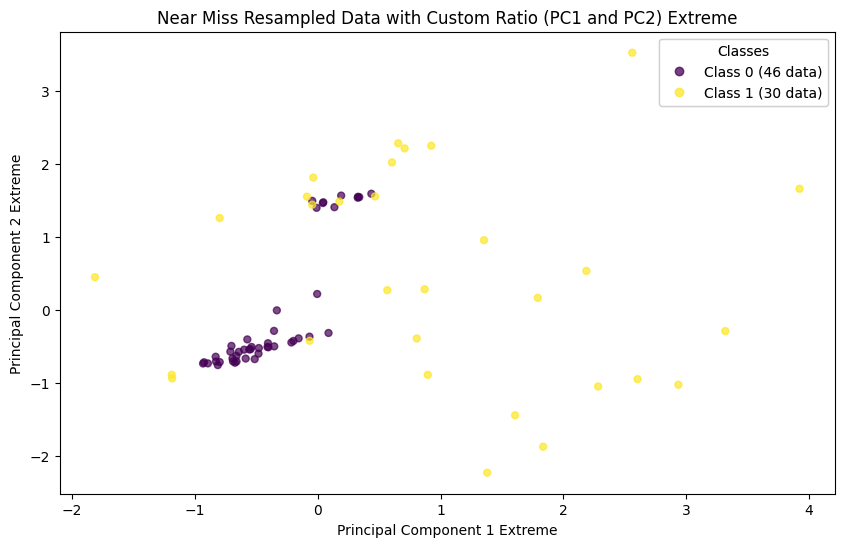

In [361]:
from imblearn.under_sampling import NearMiss

# Bagian 3: Near Miss
# Pilih fitur hasil PCA (sesuaikan dengan jumlah komponen utama yang digunakan)
X_pca = df_pca_result_extreme.drop(['stroke', 'Cluster'], axis=1).values  # Hapus kolom 'Cluster'
y = df_pca_result_extreme['stroke'].values
cluster_labels = df_pca_result_extreme['Cluster'].values  # Simpan label kluster sebelum dihapus

# Inisialisasi model Near Miss dengan rasio kustom (misalnya, 0.2 untuk mendapatkan rasio 80:20)
nm_custom_ratio = NearMiss(sampling_strategy=0.65, n_neighbors=3, version=2)

# Resample data menggunakan Near Miss dengan rasio kustom
X_resampled_custom, y_resampled_custom = nm_custom_ratio.fit_resample(X_pca, y)

# Buat DataFrame baru dari data yang sudah di-resample dengan rasio kustom
df_resampled_custom = pd.DataFrame(data=X_resampled_custom, columns=[f"PC{i+1}" for i in range(X_resampled_custom.shape[1])])
df_resampled_custom['stroke'] = y_resampled_custom

# Tambahkan kembali kolom 'Cluster'
df_resampled_custom['Cluster'] = cluster_labels[:len(df_resampled_custom)]

# Bulatkan nilai hasil Near Miss Resampling dengan rasio kustom ke 4 angka di belakang koma
df_resampled_custom_rounded = df_resampled_custom.round(4)


# Menyimpan hasil Near Miss Resampling dengan rasio kustom ke file CSV
result_csv_path_resampled_custom = 'D:/Tugas Akhir/Stroke/data_hasil_nearmiss_extreme.csv'
df_resampled_custom_rounded.to_csv(result_csv_path_resampled_custom, index=False)

# Hitung jumlah data untuk masing-masing kelas setelah resampling dengan rasio kustom
count_class_0_custom = df_resampled_custom_rounded[df_resampled_custom['stroke'] == 0].shape[0]
count_class_1_custom = df_resampled_custom_rounded[df_resampled_custom['stroke'] == 1].shape[0]

# Visualisasi data setelah resampling dengan rasio kustom
plt.figure(figsize=(10, 6))
scatter_resampled_custom = plt.scatter(df_resampled_custom_rounded['PC1'], df_resampled_custom_rounded['PC2'], c=df_resampled_custom['stroke'], cmap='viridis', marker='o', s=25, alpha=0.7)

# Tambahkan legenda untuk kelas
legend_resampled_custom = plt.legend(*scatter_resampled_custom.legend_elements(), title="Classes")
# Tambahkan keterangan jumlah data pada legend
legend_resampled_custom.texts[0].set_text(f'Class 0 ({count_class_0_custom} data)')
legend_resampled_custom.texts[1].set_text(f'Class 1 ({count_class_1_custom} data)')

plt.gca().add_artist(legend_resampled_custom)

# Tambahkan label dan judul
plt.title('Near Miss Resampled Data with Custom Ratio (PC1 and PC2) Extreme')
plt.xlabel('Principal Component 1 Extreme')
plt.ylabel('Principal Component 2 Extreme')
plt.show()


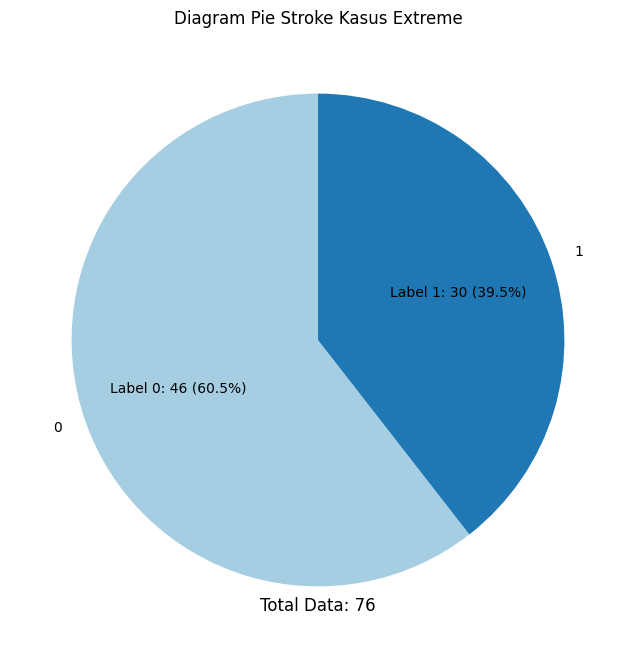

In [362]:
# Hitung frekuensi nilai unik dalam kolom 'stroke'
stroke_counts = df_resampled_custom['stroke'].value_counts()

# Plotting diagram pie untuk kolom 'stroke'
plt.figure(figsize=(8, 8))
pie_chart, _, autotexts = plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, textprops=dict(color="black"))

# Tambahkan keterangan total data
total_data = len(df_resampled_custom['stroke'])
plt.text(0, -1.1, f'Total Data: {total_data}', fontsize=12, ha='center')

# Tambahkan keterangan jumlah data pada label 0 pada legenda
label_0_count = stroke_counts[0]
autotexts[0].set_text(f'Label 0: {label_0_count} ({stroke_counts[0]/total_data*100:.1f}%)')

# Tambahkan keterangan jumlah data pada label 1 pada legenda
label_1_count = stroke_counts[1]
autotexts[1].set_text(f'Label 1: {label_1_count} ({stroke_counts[1]/total_data*100:.1f}%)')

# Berikan judul
plt.title('Diagram Pie Stroke Kasus Extreme')

# Tampilkan diagram
plt.show()


In [363]:
df_resampled_custom_rounded

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,stroke,Cluster
0,0.0454,1.4776,0.2833,-0.4726,1.1645,-1.4793,0.0496,-0.0434,-1.2224,0.8218,-0.2692,-0.5128,0.2727,0,1
1,-0.5580,-0.5396,1.6776,-0.3919,0.1744,0.0910,0.0103,-0.0305,-1.1521,0.2849,-0.5984,-0.1249,0.6249,0,0
2,0.3382,1.5483,0.3136,-0.6456,1.0693,-1.5518,-0.2368,-0.2153,-1.3136,0.8603,-0.1137,-0.2689,0.9716,0,1
3,-0.3545,-0.4968,1.7308,-0.5302,0.0238,0.0279,-0.4167,-0.0653,-1.1065,0.5004,-0.4960,-0.7621,0.6737,0,3
4,-0.4800,-0.5194,1.7212,-0.4384,0.0940,0.0782,-0.2168,-0.0025,-1.0881,0.4419,-0.5802,-0.7045,0.4531,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.6072,-1.4407,0.0553,-0.7620,-1.5520,-0.8354,0.2250,1.1951,2.2515,-0.9046,0.2886,-0.3301,1.9275,1,3
72,-0.0660,-0.4206,2.0552,0.1762,-0.4346,0.1627,0.9061,0.2003,1.5649,1.5725,2.5932,1.1732,2.0806,1,4
73,-0.0451,1.4449,0.3273,-1.2067,0.8030,2.3934,1.0336,0.0741,-1.1068,0.8241,-1.0349,-1.0975,0.7019,1,4
74,2.5613,3.5270,2.6722,1.1776,0.9326,0.8750,0.2209,0.1416,1.4190,2.9943,-0.5556,0.7633,-1.5516,1,1
